In [ ]:
from datetime import date, timedelta
import matplotlib as mplt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import Week
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# Import du dataset

%cd "Chemin vers le Dataset"

df_RFM = pd.read_csv("df_RFM.csv", sep=",")
df_resultat_kmeans = pd.read_csv("df_resultat_kmeans.csv", sep=",")
df_olist_complet = pd.read_csv("df_olist_complet.csv", sep=",")

C:\Users\33769\OneDrive\Bureau\DataScientist\Projets\Projet_5


In [ ]:
df_olist_complet

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,...,2018-08-18 00:00:00,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,115604,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,...,2018-03-01 00:00:00,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby
115605,115605,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,...,2017-09-22 00:00:00,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2
115606,115606,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,...,2018-01-26 00:00:00,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories
115607,115607,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,...,2018-01-26 00:00:00,2018-01-27 09:16:56,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories


In [ ]:
del df_olist_complet["Unnamed: 0"]
df_olist_complet

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018-08-18 00:00:00,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,2018-03-01 00:00:00,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby
115605,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,2017-09-22 00:00:00,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2
115606,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,2018-01-26 00:00:00,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories
115607,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,2018-01-26 00:00:00,2018-01-27 09:16:56,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories


In [ ]:
df_resultat_kmeans = df_resultat_kmeans[["customer_unique_id",
                                         "Cluster Kmeans"]]
df_resultat_kmeans

,customer_unique_id,Cluster Kmeans
0,0000366f3b9a7992bf8c76cfdf3221e2,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91462,fffcf5a5ff07b0908bd4e2dbc735a684,4
91463,fffea47cd6d3cc0a88bd621562a9d061,0
91464,ffff371b4d645b6ecea244b27531430a,1
91465,ffff5962728ec6157033ef9805bacc48,0


# Segmentation par date de commande semaine, mois, trimestre, 6 mois, et recherche de la taille minimale pour la premiere tranche pour clustering.

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   customer_unique_id             115609 non-null  object 
 9   customer_zip_code_prefix       115609 non-null  int64  
 10  customer_city                  115609 non-null  object 
 11  customer_state                 115609 non-null  object 
 12  review_id                     

In [ ]:
df_olist_complet["order_purchase_timestamp"] = pd.to_datetime(
    df_olist_complet["order_purchase_timestamp"]
)
df_olist_complet["order_approved_at"] = pd.to_datetime(
    df_olist_complet["order_approved_at"]
)
df_olist_complet["order_delivered_carrier_date"] = pd.to_datetime(
    df_olist_complet["order_delivered_carrier_date"]
)
df_olist_complet["order_delivered_customer_date"] = pd.to_datetime(
    df_olist_complet["order_delivered_customer_date"]
)
df_olist_complet["order_estimated_delivery_date"] = pd.to_datetime(
    df_olist_complet["order_estimated_delivery_date"]
)
df_olist_complet["review_creation_date"] = pd.to_datetime(
    df_olist_complet["review_creation_date"]
)
df_olist_complet["review_answer_timestamp"] = pd.to_datetime(
    df_olist_complet["review_answer_timestamp"]
)
df_olist_complet["shipping_limit_date"] = pd.to_datetime(
    df_olist_complet["shipping_limit_date"]
)


In [ ]:
df_olist_complet["order_approved_at"].min()

Timestamp('2017-01-05 12:10:17')

In [ ]:
df_olist_complet["order_approved_at"].max()

Timestamp('2018-09-03 17:40:06')

### Semaine

In [ ]:
df_olist_complet["weekly_command"] = df_olist_complet["order_approved_at"]
df_olist_complet.set_index("weekly_command", inplace=True)
df_olist_complet = df_olist_complet.to_period(freq='W')
df_olist_complet = df_olist_complet.reset_index()
df_olist_complet

,weekly_command,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-11,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-11,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-11,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,2018-07-23/2018-07-29,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,...,2018-08-08,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,2018-08-06/2018-08-12,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,...,2018-08-18,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018-02-05/2018-02-11,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,...,2018-03-01,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby
115605,2017-08-21/2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,...,2017-09-22,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2
115606,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,2018-01-26,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories
115607,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,2018-01-26,2018-01-27 09:16:56,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories


In [ ]:
df_olist_complet["weekly_command"].nunique()

88

### Mois

In [ ]:
df_olist_complet["monthly_command"] = df_olist_complet["order_approved_at"]
df_olist_complet.set_index("monthly_command", inplace=True)
df_olist_complet = df_olist_complet.to_period(freq='M')
df_olist_complet = df_olist_complet.reset_index()
df_olist_complet

,monthly_command,weekly_command,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,2017-10-11,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,2017-10-11,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,...,2017-10-11,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,2018-07,2018-07-23/2018-07-29,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,...,2018-08-08,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,2018-08,2018-08-06/2018-08-12,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,...,2018-08-18,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018-02,2018-02-05/2018-02-11,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,...,2018-03-01,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby
115605,2017-08,2017-08-21/2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,...,2017-09-22,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2
115606,2018-01,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,...,2018-01-26,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories
115607,2018-01,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,...,2018-01-26,2018-01-27 09:16:56,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories


In [ ]:
df_olist_complet["monthly_command"].nunique()

21

### Trimestre

In [ ]:
df_olist_complet["quarter_command"] = df_olist_complet["order_approved_at"]
df_olist_complet.set_index("quarter_command", inplace=True)
df_olist_complet = df_olist_complet.to_period(freq='Q')
df_olist_complet = df_olist_complet.reset_index()
df_olist_complet

,quarter_command,monthly_command,weekly_command,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,2017Q4,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,2017-10-11,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,2017Q4,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,2017-10-11,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,2017Q4,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,2017-10-11,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,2018Q3,2018-07,2018-07-23/2018-07-29,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,...,2018-08-08,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,2018Q3,2018-08,2018-08-06/2018-08-12,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,...,2018-08-18,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018Q1,2018-02,2018-02-05/2018-02-11,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,...,2018-03-01,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby
115605,2017Q3,2017-08,2017-08-21/2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,...,2017-09-22,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2
115606,2018Q1,2018-01,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,...,2018-01-26,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories
115607,2018Q1,2018-01,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,...,2018-01-26,2018-01-27 09:16:56,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories


In [ ]:
df_olist_complet["quarter_command"].nunique()

7

In [ ]:
df_olist_complet["quarter_command"].value_counts()

2018Q1    24466
2018Q2    23614
2017Q4    20740
2017Q3    14864
2018Q3    14698
2017Q2    10769
2017Q1     6444
Freq: Q-DEC, Name: quarter_command, dtype: int64

### Semestre

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   quarter_command                115595 non-null  period[Q-DEC] 
 1   monthly_command                115595 non-null  period[M]     
 2   weekly_command                 115595 non-null  period[W-SUN] 
 3   order_id                       115609 non-null  object        
 4   customer_id                    115609 non-null  object        
 5   order_status                   115609 non-null  object        
 6   order_purchase_timestamp       115609 non-null  datetime64[ns]
 7   order_approved_at              115595 non-null  datetime64[ns]
 8   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 9   order_delivered_customer_date  113209 non-null  datetime64[ns]
 10  order_estimated_delivery_date  115609 non-null  datetime64[ns]
 11  

In [ ]:
df_olist_complet["weekly_command"] = df_olist_complet["weekly_command"
                                                      ].astype(str)
df_olist_complet["monthly_command"] = df_olist_complet["monthly_command"
                                                       ].astype(str)
df_olist_complet["quarter_command"] = df_olist_complet["quarter_command"
                                                       ].astype(str)

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   quarter_command                115609 non-null  object        
 1   monthly_command                115609 non-null  object        
 2   weekly_command                 115609 non-null  object        
 3   order_id                       115609 non-null  object        
 4   customer_id                    115609 non-null  object        
 5   order_status                   115609 non-null  object        
 6   order_purchase_timestamp       115609 non-null  datetime64[ns]
 7   order_approved_at              115595 non-null  datetime64[ns]
 8   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 9   order_delivered_customer_date  113209 non-null  datetime64[ns]
 10  order_estimated_delivery_date  115609 non-null  datetime64[ns]
 11  

In [ ]:
semestres = {"2017Q1": "2017S1",
             "2017Q2": "2017S1",
             "2017Q3": "2017S2",
             "2017Q4": "2017S2",
             "2018Q1": "2018S1",
             "2018Q2": "2018S1",
             "2018Q3": "2018S2"}

df_olist_complet["semester_command"] = df_olist_complet["quarter_command"
                                                        ].map(semestres)

df_olist_complet

,quarter_command,monthly_command,weekly_command,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english,semester_command
0,2017Q4,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2
1,2017Q4,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2
2,2017Q4,2017-10,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,...,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2
3,2018Q3,2018-07,2018-07-23/2018-07-29,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,...,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery,2018S2
4,2018Q3,2018-08,2018-08-06/2018-08-12,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,...,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto,2018S2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018Q1,2018-02,2018-02-05/2018-02-11,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,...,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby,2018S1
115605,2017Q3,2017-08,2017-08-21/2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,...,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2,2017S2
115606,2018Q1,2018-01,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,...,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories,2018S1
115607,2018Q1,2018-01,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,...,2018-01-27 09:16:56,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories,2018S1


# Segmentation par date de commande semaine, puis clustering sur la premiere année et simulation pour recherche de frequence de maintenance

## Creation des datasets : 1er semestre puis ajout d'une semaine supplémentaire pour chaque itération

In [ ]:
del df_olist_complet["quarter_command"]
del df_olist_complet["monthly_command"]
df_olist_complet

,weekly_command,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english,semester_command
0,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2
1,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2
2,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2
3,2018-07-23/2018-07-29,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,...,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery,2018S2
4,2018-08-06/2018-08-12,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,...,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto,2018S2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018-02-05/2018-02-11,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,...,2018-03-02 17:50:01,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby,2018S1
115605,2017-08-21/2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,...,2017-09-22 23:10:57,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2,2017S2
115606,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,2018-01-27 09:16:56,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories,2018S1
115607,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,2018-01-27 09:16:56,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories,2018S1


In [ ]:
df_olist_complet.dropna(inplace=True)

In [ ]:
df_olist_complet.sort_values("weekly_command")

,weekly_command,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english,semester_command
99474,2017-01-02/2017-01-08,9a3e437ab219133c20a7033be9087edf,3c03fed2df425b8291c5913c52b51b84,delivered,2017-01-07 20:45:31,2017-01-07 20:55:10,2017-01-10 13:46:14,2017-01-17 11:38:10,2017-02-07,2e8eb06baae199a63d3a7b603efa771a,...,2017-01-18 23:44:14,3,164.21,1,368343a35b2e888dae4f3f831d22437a,fa1c13f2614d7b5c4749cbc52fecda94,2017-01-11 20:45:31,149.00,watches_gifts,2017S1
31463,2017-01-02/2017-01-08,6acecf438369055d9243e121045cca74,42d857e22f61f10476f0cda1aacc018a,delivered,2017-01-05 12:11:23,2017-01-07 03:44:07,2017-01-11 16:22:53,2017-01-17 16:06:30,2017-02-13,728e4a7d0db4845270091ded0923c71f,...,2017-01-20 10:01:16,1,18.62,1,1514ddb0f4a5afc8d24104e89c714403,48efc9d94a9834137efd9ea76b065a38,2017-01-09 12:11:23,9.90,pet_shop,2017S1
84482,2017-01-02/2017-01-08,1b694ef5b28d3e949a4f0ffeb2c9fcd6,cba12036a88407a37770dc8ab725de77,delivered,2017-01-05 13:43:17,2017-01-07 03:35:38,2017-01-11 16:08:55,2017-01-16 16:54:04,2017-02-13,d753459418d268407f19b64be28e3c5a,...,2017-01-17 12:41:29,1,18.62,1,e500a9395078ba5b59387db0dbee0063,48efc9d94a9834137efd9ea76b065a38,2017-01-09 13:43:17,9.90,music,2017S1
109872,2017-01-02/2017-01-08,e6db6e9529fecbe14cd05dd349816656,6b3efc29f67766dd725bb29e857614f2,delivered,2017-01-06 21:27:49,2017-01-06 21:35:20,2017-01-09 12:08:34,2017-01-13 13:57:29,2017-02-20,c9517b423493063fa4e805acf2cc4564,...,2017-01-17 13:18:41,1,124.84,1,06ead9c0b05b368667d858c09148af03,b2ba3715d723d245138f291a6fe42594,2017-01-15 21:27:49,109.90,consoles_games,2017S1
70739,2017-01-02/2017-01-08,e1fe072ef14b519af1f0a8ed997c1301,758b633d88b82063db189810084f4ea9,delivered,2017-01-05 15:32:59,2017-01-05 16:15:16,2017-01-06 13:45:22,2017-01-12 14:13:19,2017-02-15,4b3207464f5f7a48a7f63fa0b1251d86,...,2017-01-13 22:36:29,1,24.42,1,743801b34cc44776de511ba8eff778e2,48efc9d94a9834137efd9ea76b065a38,2017-01-09 15:32:59,9.90,furniture_bedroom,2017S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24704,2018-08-27/2018-09-02,d22567ff9749170e14c7485e02c1ff3c,9883a8a9a4eee71337503a8374f0f786,delivered,2018-08-27 16:57:10,2018-08-27 17:10:29,2018-08-29 15:03:00,2018-08-30 18:57:56,2018-08-31,d1ad3a8317c14afb90799ae8740b99fa,...,2018-09-02 22:41:26,1,28.20,1,6db41bd5a650ed247a5690c0e78c3969,7722b1df1b0e383e000397b2c11e3e19,2018-08-30 17:10:29,19.90,housewares,2018S2
81940,2018-08-27/2018-09-02,e41e7842fa15d821ce598a8b80915cd8,22263f5c5d6ca2fe997157c56fdf05e8,delivered,2018-08-27 22:34:17,2018-08-27 22:45:14,2018-08-28 14:15:00,2018-08-29 20:02:13,2018-08-30,31ffd7ebf0a3657a9d21ae8f3f302164,...,2018-08-30 23:48:19,2,100.86,1,d6897f1dfdc99bbbdfda785158793d45,508808d438fe2ff972ed13bb8f4a82e2,2018-08-29 22:45:14,41.99,housewares,2018S2
84860,2018-08-27/2018-09-02,68dd7c23e8b6c1e5f3ad16be5dd4bdf6,175f8430de932f744f8eebc3c680915e,delivered,2018-08-27 22:59:03,2018-08-27 23:10:16,2018-08-28 13:30:00,2018-08-29 20:19:50,2018-08-30,41d57ab847e5ccbe403f46b07ee577d6,...,2018-08-31 17:18:14,5,50.45,1,995e25d9b46dee183004994645768d95,955fee9216a65b617aa5c0531780ce60,2018-08-29 23:10:16,42.00,sports_leisure,2018S2
32195,2018-08-27/2018-09-02,a5ee139d1586d2d22c21ce7048e1d36d,7501487f2c74cc52064641b5793bbf4e,delivered,2018-08-27 15:15:03,2018-08-27 15:30:24,2018-08-28 18:04:00,2018-08-29 16:28:39,2018-08-31,ebd16156e915376664512033f080f70d,...,2018-08-31 14:23:57,1,28.04,1,c708ba7c6269161f89ce0683cdd7c432,6560211a19b47992c3666cc44a7e94c0,2018-08-29 15:30:24,49.00,watches_gifts,2018S2


In [ ]:
df_olist_complet["weekly_command"].nunique()

87

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113194 entries, 0 to 115608
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   weekly_command                 113194 non-null  object        
 1   order_id                       113194 non-null  object        
 2   customer_id                    113194 non-null  object        
 3   order_status                   113194 non-null  object        
 4   order_purchase_timestamp       113194 non-null  datetime64[ns]
 5   order_approved_at              113194 non-null  datetime64[ns]
 6   order_delivered_carrier_date   113194 non-null  datetime64[ns]
 7   order_delivered_customer_date  113194 non-null  datetime64[ns]
 8   order_estimated_delivery_date  113194 non-null  datetime64[ns]
 9   customer_unique_id             113194 non-null  object        
 10  customer_zip_code_prefix       113194 non-null  int64         
 11  

In [ ]:
liste_semaines = df_olist_complet["weekly_command"].unique().tolist()
liste_semaines = sorted(liste_semaines)
liste_semaines

['2017-01-02/2017-01-08',
 '2017-01-09/2017-01-15',
 '2017-01-16/2017-01-22',
 '2017-01-23/2017-01-29',
 '2017-01-30/2017-02-05',
 '2017-02-06/2017-02-12',
 '2017-02-13/2017-02-19',
 '2017-02-20/2017-02-26',
 '2017-02-27/2017-03-05',
 '2017-03-06/2017-03-12',
 '2017-03-13/2017-03-19',
 '2017-03-20/2017-03-26',
 '2017-03-27/2017-04-02',
 '2017-04-03/2017-04-09',
 '2017-04-10/2017-04-16',
 '2017-04-17/2017-04-23',
 '2017-04-24/2017-04-30',
 '2017-05-01/2017-05-07',
 '2017-05-08/2017-05-14',
 '2017-05-15/2017-05-21',
 '2017-05-22/2017-05-28',
 '2017-05-29/2017-06-04',
 '2017-06-05/2017-06-11',
 '2017-06-12/2017-06-18',
 '2017-06-19/2017-06-25',
 '2017-06-26/2017-07-02',
 '2017-07-03/2017-07-09',
 '2017-07-10/2017-07-16',
 '2017-07-17/2017-07-23',
 '2017-07-24/2017-07-30',
 '2017-07-31/2017-08-06',
 '2017-08-07/2017-08-13',
 '2017-08-14/2017-08-20',
 '2017-08-21/2017-08-27',
 '2017-08-28/2017-09-03',
 '2017-09-04/2017-09-10',
 '2017-09-11/2017-09-17',
 '2017-09-18/2017-09-24',
 '2017-09-25

In [ ]:
valeur_liste_semaine = list(range(87))
valeur_liste_semaine

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86]

In [ ]:
dict_semaines = dict(zip(liste_semaines, valeur_liste_semaine))
dict_semaines

{'2017-01-02/2017-01-08': 0,
 '2017-01-09/2017-01-15': 1,
 '2017-01-16/2017-01-22': 2,
 '2017-01-23/2017-01-29': 3,
 '2017-01-30/2017-02-05': 4,
 '2017-02-06/2017-02-12': 5,
 '2017-02-13/2017-02-19': 6,
 '2017-02-20/2017-02-26': 7,
 '2017-02-27/2017-03-05': 8,
 '2017-03-06/2017-03-12': 9,
 '2017-03-13/2017-03-19': 10,
 '2017-03-20/2017-03-26': 11,
 '2017-03-27/2017-04-02': 12,
 '2017-04-03/2017-04-09': 13,
 '2017-04-10/2017-04-16': 14,
 '2017-04-17/2017-04-23': 15,
 '2017-04-24/2017-04-30': 16,
 '2017-05-01/2017-05-07': 17,
 '2017-05-08/2017-05-14': 18,
 '2017-05-15/2017-05-21': 19,
 '2017-05-22/2017-05-28': 20,
 '2017-05-29/2017-06-04': 21,
 '2017-06-05/2017-06-11': 22,
 '2017-06-12/2017-06-18': 23,
 '2017-06-19/2017-06-25': 24,
 '2017-06-26/2017-07-02': 25,
 '2017-07-03/2017-07-09': 26,
 '2017-07-10/2017-07-16': 27,
 '2017-07-17/2017-07-23': 28,
 '2017-07-24/2017-07-30': 29,
 '2017-07-31/2017-08-06': 30,
 '2017-08-07/2017-08-13': 31,
 '2017-08-14/2017-08-20': 32,
 '2017-08-21/2017-08

In [ ]:
df_olist_complet["numero_semaine"] = df_olist_complet[
    "weekly_command"].map(dict_semaines)
df_olist_complet

,weekly_command,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english,semester_command,numero_semaine
0,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2,39
1,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2,39
2,2017-10-02/2017-10-08,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,...,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares,2017S2,39
3,2018-07-23/2018-07-29,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,...,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery,2018S2,81
4,2018-08-06/2018-08-12,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,...,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto,2018S2,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,2018-02-05/2018-02-11,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,...,3,195.00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,baby,2018S1,57
115605,2017-08-21/2017-08-27,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,...,5,271.01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,home_appliances_2,2017S2,33
115606,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,4,441.16,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories,2018S1,53
115607,2018-01-08/2018-01-14,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,...,4,441.16,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,computers_accessories,2018S1,53


In [ ]:
del df_olist_complet["weekly_command"]

In [ ]:
df_ARI_26 = df_olist_complet[df_olist_complet["numero_semaine"] <= 26]
df_ARI_26

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english,semester_command,numero_semaine
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,...,6,175.26,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,auto,2017S2,26
8,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,...,3,75.16,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,auto,2017S1,19
9,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,39382392765b6dc74812866ee5ee92a7,99655,...,1,35.95,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,furniture_decor,2017S1,3
12,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,f2a85dec752b8517b5e58a06ff3cd937,20780,...,1,259.06,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,garden_tools,2017S1,19
13,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,f2a85dec752b8517b5e58a06ff3cd937,20780,...,1,259.06,2,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,garden_tools,2017S1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115589,7cc85185736ea7f2d8bc09af7a47cab7,9e870ea67399650e8c3545a25d13e4d0,delivered,2017-05-15 09:46:26,2017-05-15 10:02:45,2017-05-15 14:11:06,2017-05-22 18:05:56,2017-06-07,7bb6ca43f478742340256d516d9d86e3,70800,...,10,194.91,1,8695c431b31927efef5343e675f279e7,fe2032dab1a61af8794248c8196565c9,2017-05-22 10:02:45,179.90,perfumery,2017S1,19
115600,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e03dbdf5e56c96b106d8115ac336f47f,35502,...,1,250.00,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-02-03 00:30:03,370.00,health_beauty,2017S1,3
115601,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17,e03dbdf5e56c96b106d8115ac336f47f,35502,...,5,139.43,1,9fc063fd34fed29ccc57b7f8e8d03388,ccc4bbb5f32a6ab2b7066a4130f114e3,2017-02-03 00:30:03,370.00,health_beauty,2017S1,3
115602,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,831ce3f1bacbd424fc4e38fbd4d66d29,5127,...,3,155.99,1,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,2017-02-27 09:05:12,139.90,furniture_decor,2017S1,7


In [ ]:
sorted(df_ARI_26["numero_semaine"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [ ]:
df_ARI_ = pd.DataFrame(columns=df_olist_complet.columns)

for i in range(27, 88):
    globals()["df_ARI_" + str(i)] = pd.DataFrame(
        columns=df_olist_complet.columns)
    globals()["df_ARI_" + str(i)] = df_olist_complet[
        df_olist_complet["numero_semaine"] == i].copy()

In [ ]:
for i in range(27, 88):
    globals()["df_ARI_" + str(i)] = pd.concat([globals()[
        "df_ARI_" + str(i-1)], globals()["df_ARI_" + str(i)]])

In [ ]:
noms_df_ARI = list(("df_ARI_" + str(i)) for i in range(26, 87))

### Dictionnaire date de fin de chaque dataframe pour le calcul de timedelta

In [ ]:
liste_semaines_max = []
for i in liste_semaines:
    a = pd.to_datetime(i[11:])+timedelta(days=1)
    liste_semaines_max.append(a)
liste_semaines_max

[Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2017-02-06 00:00:00'),
 Timestamp('2017-02-13 00:00:00'),
 Timestamp('2017-02-20 00:00:00'),
 Timestamp('2017-02-27 00:00:00'),
 Timestamp('2017-03-06 00:00:00'),
 Timestamp('2017-03-13 00:00:00'),
 Timestamp('2017-03-20 00:00:00'),
 Timestamp('2017-03-27 00:00:00'),
 Timestamp('2017-04-03 00:00:00'),
 Timestamp('2017-04-10 00:00:00'),
 Timestamp('2017-04-17 00:00:00'),
 Timestamp('2017-04-24 00:00:00'),
 Timestamp('2017-05-01 00:00:00'),
 Timestamp('2017-05-08 00:00:00'),
 Timestamp('2017-05-15 00:00:00'),
 Timestamp('2017-05-22 00:00:00'),
 Timestamp('2017-05-29 00:00:00'),
 Timestamp('2017-06-05 00:00:00'),
 Timestamp('2017-06-12 00:00:00'),
 Timestamp('2017-06-19 00:00:00'),
 Timestamp('2017-06-26 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-17 00:00:00'),
 Timestamp('2017-07-

In [ ]:
liste_semaines_max[26:]

[Timestamp('2017-07-10 00:00:00'),
 Timestamp('2017-07-17 00:00:00'),
 Timestamp('2017-07-24 00:00:00'),
 Timestamp('2017-07-31 00:00:00'),
 Timestamp('2017-08-07 00:00:00'),
 Timestamp('2017-08-14 00:00:00'),
 Timestamp('2017-08-21 00:00:00'),
 Timestamp('2017-08-28 00:00:00'),
 Timestamp('2017-09-04 00:00:00'),
 Timestamp('2017-09-11 00:00:00'),
 Timestamp('2017-09-18 00:00:00'),
 Timestamp('2017-09-25 00:00:00'),
 Timestamp('2017-10-02 00:00:00'),
 Timestamp('2017-10-09 00:00:00'),
 Timestamp('2017-10-16 00:00:00'),
 Timestamp('2017-10-23 00:00:00'),
 Timestamp('2017-10-30 00:00:00'),
 Timestamp('2017-11-06 00:00:00'),
 Timestamp('2017-11-13 00:00:00'),
 Timestamp('2017-11-20 00:00:00'),
 Timestamp('2017-11-27 00:00:00'),
 Timestamp('2017-12-04 00:00:00'),
 Timestamp('2017-12-11 00:00:00'),
 Timestamp('2017-12-18 00:00:00'),
 Timestamp('2017-12-25 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-01-08 00:00:00'),
 Timestamp('2018-01-15 00:00:00'),
 Timestamp('2018-01-

In [ ]:
dict_semaines_max = dict(zip(noms_df_ARI, liste_semaines_max[26:]))
dict_semaines_max

{'df_ARI_26': Timestamp('2017-07-10 00:00:00'),
 'df_ARI_27': Timestamp('2017-07-17 00:00:00'),
 'df_ARI_28': Timestamp('2017-07-24 00:00:00'),
 'df_ARI_29': Timestamp('2017-07-31 00:00:00'),
 'df_ARI_30': Timestamp('2017-08-07 00:00:00'),
 'df_ARI_31': Timestamp('2017-08-14 00:00:00'),
 'df_ARI_32': Timestamp('2017-08-21 00:00:00'),
 'df_ARI_33': Timestamp('2017-08-28 00:00:00'),
 'df_ARI_34': Timestamp('2017-09-04 00:00:00'),
 'df_ARI_35': Timestamp('2017-09-11 00:00:00'),
 'df_ARI_36': Timestamp('2017-09-18 00:00:00'),
 'df_ARI_37': Timestamp('2017-09-25 00:00:00'),
 'df_ARI_38': Timestamp('2017-10-02 00:00:00'),
 'df_ARI_39': Timestamp('2017-10-09 00:00:00'),
 'df_ARI_40': Timestamp('2017-10-16 00:00:00'),
 'df_ARI_41': Timestamp('2017-10-23 00:00:00'),
 'df_ARI_42': Timestamp('2017-10-30 00:00:00'),
 'df_ARI_43': Timestamp('2017-11-06 00:00:00'),
 'df_ARI_44': Timestamp('2017-11-13 00:00:00'),
 'df_ARI_45': Timestamp('2017-11-20 00:00:00'),
 'df_ARI_46': Timestamp('2017-11-27 00:0

### Création des dataframes RFM pour chaque periode temporelle

In [ ]:
for i in noms_df_ARI:

    df_recence = (
    globals()[str(i)][["customer_unique_id", "order_approved_at"]]
    .groupby(by="customer_unique_id")
    .max())
    df_recence.reset_index(inplace=True)
    df_recence.rename(columns={"order_approved_at": "last_order_datetime"},
                      inplace=True)
    df_recence["last_order_datetime_delta"] = df_recence[
        "last_order_datetime"]-dict_semaines_max.get(i)
 
    df_recence["last_order_datetime_delta"] = df_recence[
    "last_order_datetime_delta"] / pd.to_timedelta(1, unit="D")
    del df_recence["last_order_datetime"]

    df_frequence = (
    globals()[str(i)][["customer_unique_id", "order_id"]]
    .groupby(by="customer_unique_id")
    .count())
    df_frequence.rename(columns={"order_id": "orders_count"}, inplace=True)
    df_frequence = df_frequence.reset_index()

    df_montant_1 = globals()[str(i)].groupby(by="customer_unique_id").max(
    "order_approved_at")
    df_montant_1 = df_montant_1.reset_index()
    df_montant_1.rename(columns={"payment_value": "payment_value_last"},
                        inplace=True)
    df_montant_1 = df_montant_1[["customer_unique_id", "payment_value_last"]]

    df_note = (
    globals()[str(i)][["customer_unique_id", "review_score"]]
    .groupby(by=["customer_unique_id"])
    .mean())
    df_note = df_note.reset_index()

    df_retard = globals()[str(i)].copy()

    df_retard["shipping_time_delay"] = (
    df_retard["order_delivered_customer_date"]
    - df_retard["order_estimated_delivery_date"])

    df_delta_livraison = (
    df_retard[["customer_unique_id", "shipping_time_delay"]]
    .groupby(by=["customer_unique_id"])
    .mean())
    df_delta_livraison = df_delta_livraison.reset_index()

    globals()[str(i)] = pd.merge(df_recence, df_frequence,
                                 on="customer_unique_id",
                indicator=True)
    globals()[str(i)] = globals()[str(i)][
        globals()[str(i)]["_merge"] == "both"]
    del globals()[str(i)]["_merge"]


    globals()[str(i)] = pd.merge(globals()[str(i)], df_montant_1,
                                 on="customer_unique_id",
                 indicator=True)
    globals()[str(i)] = globals()[str(i)][
        globals()[str(i)]["_merge"] == "both"]
    del globals()[str(i)]["_merge"]

    globals()[str(i)] = pd.merge(globals()[str(i)], df_note,
                                 on="customer_unique_id",
                 indicator=True)
    globals()[str(i)] = globals()[str(i)][
        globals()[str(i)]["_merge"] == "both"]
    del globals()[str(i)]["_merge"]

    globals()[str(i)] = pd.merge(globals()[str(i)],
                                 df_delta_livraison, on="customer_unique_id",
                 indicator=True)

    globals()[str(i)] = globals()[str(i)][
        globals()[str(i)]["_merge"] == "both"]
    del globals()[str(i)]["_merge"]

    globals()[str(i)] = globals()[str(i)][["customer_unique_id",
                                           "orders_count",
                                           "payment_value_last",
                                           "review_score",
                                           "shipping_time_delay",
                                           "last_order_datetime_delta"]]
    
    globals()[str(i)]["shipping_time_delay"] = globals()[
        str(i)]["shipping_time_delay"
                                 ] / pd.to_timedelta(1, unit="D")


## Kmeans 1er semestre

In [ ]:
df_ARI_26

,customer_unique_id,orders_count,payment_value_last,review_score,shipping_time_delay,last_order_datetime_delta
0,0000f46a3911fa3c0805444483337064,1,86.22,3.0,-1.389734,-121.121493
1,0005e1862207bf6ccc02e4228effd9a0,1,150.12,4.0,-27.643657,-127.011505
2,00115fc7123b5310cf6d3a3aa932699e,1,76.11,4.0,-32.085000,-169.076238
3,0011805441c0d1b68b48002f1d005526,1,297.14,3.0,-12.413403,-76.423403
4,0011857aff0e5871ce5eb429f21cdaf5,1,192.83,5.0,-19.283495,-11.530972
...,...,...,...,...,...,...
14328,ffedff0547d809c90c05c2691c51f9b7,1,32.42,5.0,-55.455984,-101.371319
14329,ffef0ffa736c7b3d9af741611089729b,1,139.07,5.0,-21.387766,-41.067674
14330,fffcf5a5ff07b0908bd4e2dbc735a684,2,2067.42,5.0,-26.609722,-31.114398
14331,ffff371b4d645b6ecea244b27531430a,1,112.46,5.0,-29.468704,-152.331435


In [ ]:
df_ARI_26["orders_count"].value_counts()

1     12198
2      1596
3       250
4       163
6        42
5        42
8         9
11        9
7         8
12        4
9         2
13        2
15        2
24        2
26        1
19        1
10        1
35        1
Name: orders_count, dtype: int64

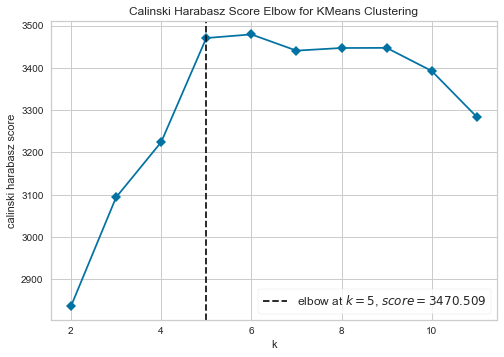

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
df_ARI_26.set_index("customer_unique_id", inplace=True)
df_ARI_26_values = df_ARI_26.values

std_scale = StandardScaler().fit(df_ARI_26_values)
df_ARI_26_values_scaled = std_scale.transform(df_ARI_26_values)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2, 12), metric="calinski_harabasz", timings=False
)

visualizer.fit(df_ARI_26_values_scaled)  # Fit the data to the visualizer
visualizer.poof()  # Draw/show/poof the data

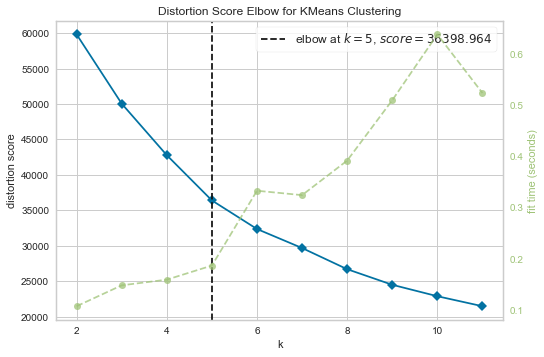

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 12))

visualizer.fit(df_ARI_26_values_scaled)  # Fit the data to the visualizer
visualizer.poof()  # Draw/show/poof the data

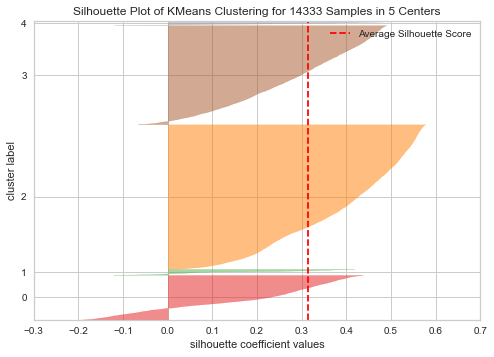

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 14333 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans(5)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_ARI_26_values_scaled)  # Fit the data to the visualizer
visualizer.poof()  # Draw/show/poof the data

### Visualisation des clusters avec ACP

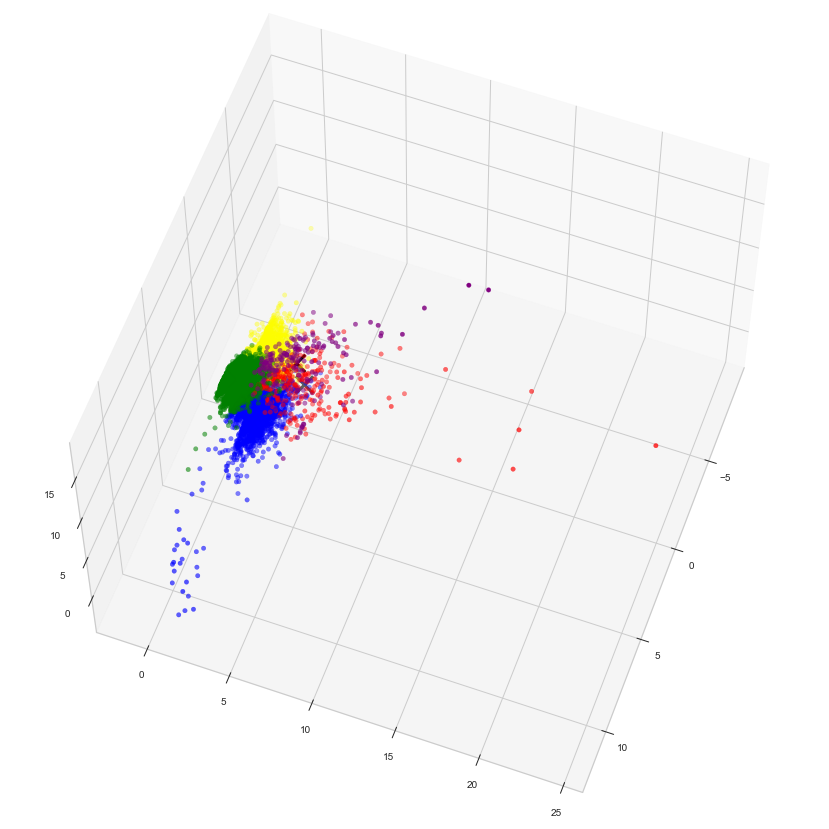

In [ ]:
features = df_ARI_26.columns

pca = PCA(n_components=3)
pca.fit(df_ARI_26_values_scaled)
# %matplotlib notebook
# projeter X sur les composantes principales
X_projected = pca.transform(df_ARI_26_values_scaled)

# afficher chaque observation


Kmeans = KMeans(n_clusters=5)
Kmeans.fit(df_ARI_26_values_scaled)

colormap = np.array(["Red", "green", "blue", "yellow", "purple"])


# afficher les clusters sur une ACP

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection="3d")
ax.scatter3D(
    X_projected[:, 0],
    X_projected[:, 1],
    X_projected[:, 2],
    c=colormap[Kmeans.labels_],
    zorder=0,
)


centroids = Kmeans.cluster_centers_

std_scale = StandardScaler().fit(df_ARI_26_values_scaled)
centroids_scaled = std_scale.transform(centroids)

centroids_projected = pca.transform(centroids_scaled)

ax.scatter3D(
    centroids_projected[:, 0],
    centroids_projected[:, 1],
    centroids_projected[:, 2],
    marker="x",
    s=300,
    linewidths=3,
    color="black",
    zorder=1,
)
# Show plot
ax.view_init(60, 20)
plt.show()

In [ ]:
cluster_kmeans = Kmeans.labels_.tolist()
vrais_labels = Kmeans.labels_.tolist()

In [ ]:
df_resultats_Kmean = pd.DataFrame(
    {"Cluster Kmeans": cluster_kmeans}, columns=["Cluster Kmeans"
                                                 ], index=df_ARI_26.index
)
df_ARI_26 = df_ARI_26.reset_index()
df_resultats_Kmean

,Cluster Kmeans
customer_unique_id,
0000f46a3911fa3c0805444483337064,2
0005e1862207bf6ccc02e4228effd9a0,3
00115fc7123b5310cf6d3a3aa932699e,3
0011805441c0d1b68b48002f1d005526,2
0011857aff0e5871ce5eb429f21cdaf5,1
...,...
ffedff0547d809c90c05c2691c51f9b7,3
ffef0ffa736c7b3d9af741611089729b,1
fffcf5a5ff07b0908bd4e2dbc735a684,4


#### Conservation uniquement des clients de la premiere année pour pouvoir comparer les resultats du clustering

In [ ]:
clients_a_conserver = df_ARI_26["customer_unique_id"].to_list()

In [ ]:
for i in noms_df_ARI:
    globals()[str(i)] = globals()[str(i)][globals()[str(i)][
        "customer_unique_id"].isin(clients_a_conserver)]
    globals()[str(i)].set_index("customer_unique_id", inplace=True)

### Simulation ARI

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
model = KMeans(5)
ARI_liste = []
for i in noms_df_ARI:
    std_scale = StandardScaler().fit(globals()[str(i)].values)
    df_ARI = std_scale.transform(globals()[str(i)].values)
    Kmeans.fit(df_ARI)
    labels_predits = Kmeans.labels_.tolist()
    ARI_liste.append(adjusted_rand_score(vrais_labels, labels_predits))

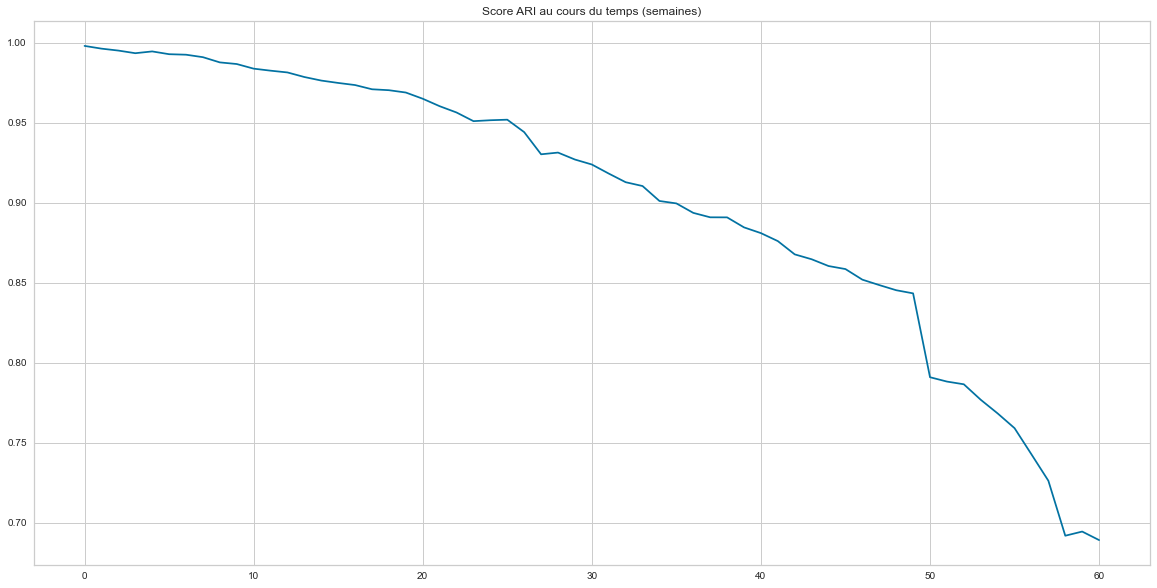

In [ ]:
plt.figure(figsize=(20, 10))
plt.title('Score ARI au cours du temps (semaines)')
plt.plot(ARI_liste)

**Pour conserver un ARI>0.8 il est conseillé de renouveler la segmentation au maximum au bout de 50 semaines**
**Pour conserver un ARI>0.9 il est conseillé de renouveler la segmentation au maximum au bout de 35 semaines**
**Il est cependant interessant de l'effectuer plus souvent pour integrer les nouveaux clients**